In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing, neighbors, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

In [3]:
# Only red wine data set in this notebook
df = pd.read_csv("winequality-red.csv", sep = ';')

In [4]:
df.shape

(1599, 12)

In [5]:
df['quality'] = df['quality'].astype(float)

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df['quality'].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

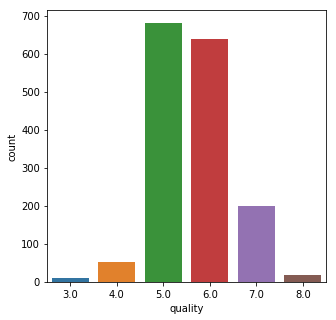

In [10]:
plt.figure(figsize = (5,5))
fig = sb.countplot(df['quality'])

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


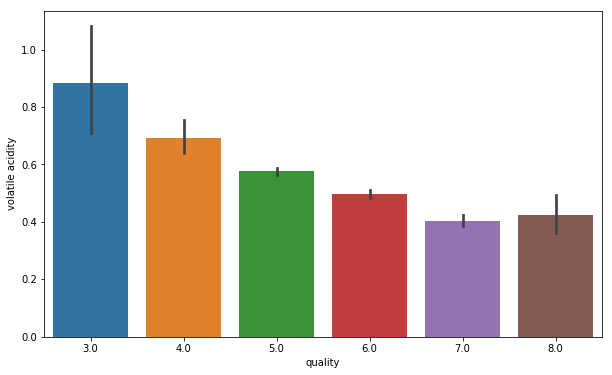

In [12]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'volatile acidity', data = df)

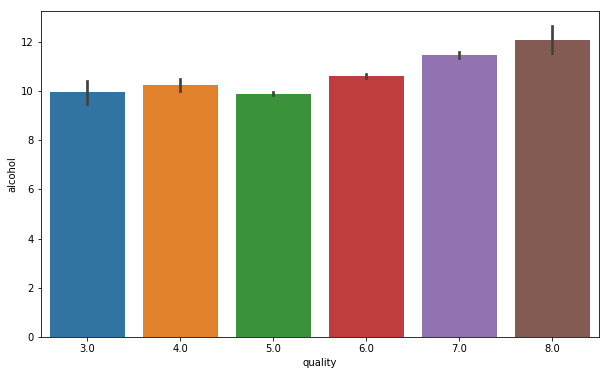

In [13]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'alcohol', data = df)

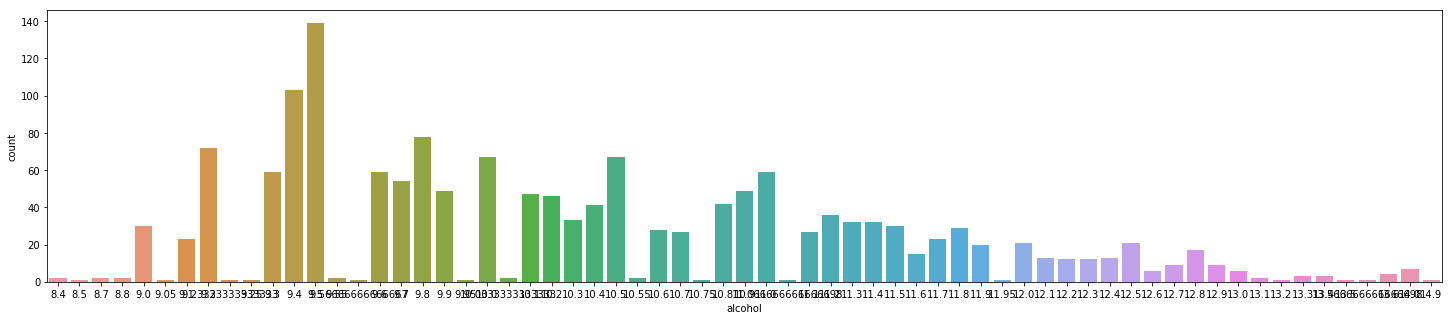

In [14]:
plt.figure(figsize = (25,5))
fig = sb.countplot(df['alcohol'])

Looking at some variables ditributions

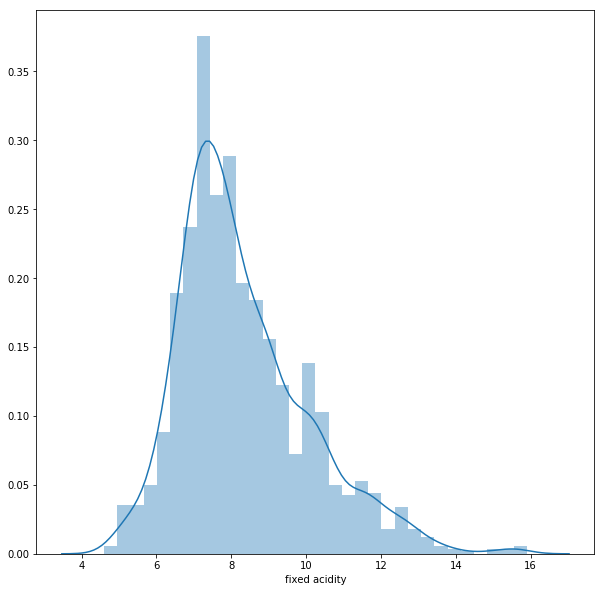

In [13]:
plt.figure(figsize = (10,10))
ax = sb.distplot(df['fixed acidity'])

Outliers

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [18]:
dfcopy= (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

In [19]:
dfcopy.shape

(1599, 12)

In [15]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from collections import Counter
import scipy.stats as ss

In [16]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

In [17]:
# one category and one numeric. the order is important
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

In [18]:
#two categorical cariables. The order is important
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [19]:
relations = pd.DataFrame()
columns = df.columns[0:len(df.columns)]#columns labels
rows = df.columns[0:len(df.columns)] # rows
          
for j in range(0,len(columns)):
    for i in range(0,len(rows)):
        if (df[columns[j]].dtypes == 'float64'  and df[rows[i]].dtypes == 'float64'):
            u = df[columns[j]].corr( df[rows[i]])
            u = u*1
            relations.loc[rows[i],columns[j]] = u
        elif  (df[rows[i]].dtypes == 'O' and df[columns[j]].dtypes == 'float64'):
            u = correlation_ratio(df[rows[i]], df[columns[j]])
            u = u*1
            u=2*u-1 # normalizing to [-1,1]
            relations.loc[rows[i],columns[j]] = u
        elif (df[columns[j]].dtypes == 'O' and df[rows[i]].dtypes == 'float64' ):
            u = correlation_ratio(df[columns[j]], df[rows[i]])
            u = u*1
            u=2*u-1 # normalizing to [-1,1]
            relations.loc[rows[i],columns[j]] = u
        elif (df[columns[j]].dtypes == 'O' and df[rows[i]].dtypes == 'O'):
            u = theils_u(df[columns[j]], df[rows[i]])
            u = u*1
            u=2*u-1 # normalizing to [-1,1]
            relations.loc[rows[i],columns[j]] = u
relations.fillna(value=np.nan,inplace=True)

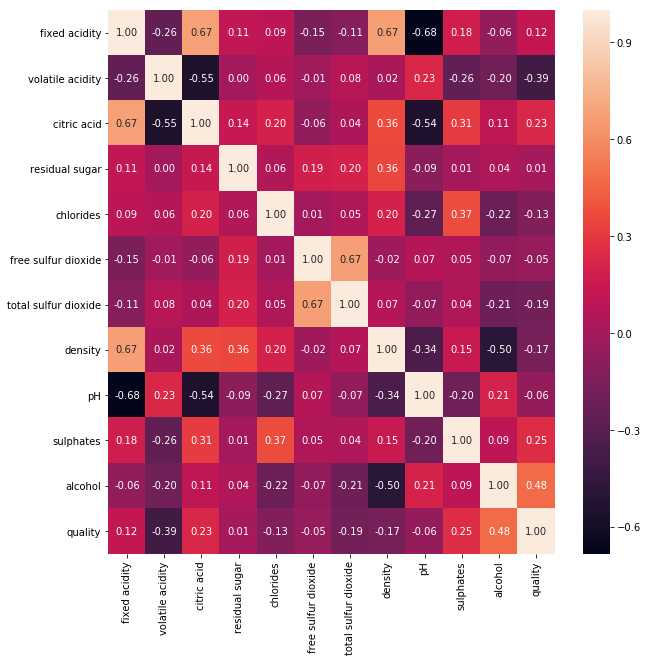

In [20]:
plt.figure(figsize=(10,10))
sb.heatmap(relations,annot=True,fmt='.2f')
plt.show()

Changing the labels to 0,1 and 2

In [21]:
def set_quality(df):
    if (df["quality"] == 3 ) or (df["quality"] == 4):
        return "0"
    elif (df["quality"] == 5) or (df["quality"] == 6):
        return "1"
    else:
        return "2"

df = df.assign(quality_type = df.apply(set_quality, axis=1))

In [22]:
df['quality_type'].value_counts()

1    1319
2     217
0      63
Name: quality_type, dtype: int64

In [23]:
X = df.drop (['quality_type', 'quality'],1)
y = df['quality_type']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [24]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train.astype(float))
X_train = pd.DataFrame(np_scaled)

In [25]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_test.astype(float))
X_test = pd.DataFrame(np_scaled)

In [26]:
clfReg = LinearRegression().fit(X_train, y_train)
print('Regression Accuracy' ,clfReg.score(X_test, y_test))

Regression Accuracy 0.06900390851890714


In [27]:
clfsvm = SVC().fit(X_train, y_train)
print('SVM Accuracy', clfsvm.score(X_test,y_test))

SVM Accuracy 0.825


In [28]:
clfknn = neighbors.KNeighborsClassifier().fit(X_train, y_train)
print('KNN Accuracy', clfknn.score(X_test, y_test))

KNN Accuracy 0.834375


I once tried linear regression, knn and svm with have quility values in [3,8] and the results were:
Linear Accuracy 0.30
SVM Accuracy 0.59
KNN Accuracy 0.58
So, I've changed the labels to low, medium and high quility or 0, 1 and 2
And that improves the accuracy to:
SVM Accuracy 0.79
KNN Accuracy 0.8125
Although linear regression accuracy drops to 0.14 with this binning method. 

In [95]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [96]:
print( "Accuracy is ", clf_gini.score(X_test,y_test) )

Accuracy is  0.8375


In [97]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=4, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [98]:
print( "Accuracy is ", clf_entropy.score(X_test,y_test) )

Accuracy is  0.81875


In [129]:
clf_random = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)
clf_random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [130]:
print( "Accuracy is ", clf_random.score(X_test,y_test) )

Accuracy is  0.840625


In [134]:
from sklearn.naive_bayes import GaussianNB
clf_guassian = GaussianNB()
clf_guassian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [135]:
print( "Accuracy is ", clf_guassian.score(X_test,y_test) )

Accuracy is  0.696875
